In [23]:
using Flux
using Statistics
using Flux: onehotbatch, crossentropy, onecold
using MLJBase
using Printf
using BSON: @save # for save weights
using Plots
using DelimitedFiles

In [3]:
rawdata = readdlm("data/test2.csv",',',skipstart=1)';

In [5]:
one = 0
zero = 0
for i in rawdata[20,:]
    if i == 1
        one = one + 1
    else
        zero = zero + 1
    end
end

difference = one - zero

322

In [6]:
function newrand()
    randCol = zeros(0)
    push!(randCol, rand(10.0:99.0))
    push!(randCol, rand(5.3:40.2))
    push!(randCol, rand(1.1:15.1))
    push!(randCol, rand(0.1:8.1))
    push!(randCol, rand(1.1:15.1))
    push!(randCol, rand(30.1:60.1))
    push!(randCol, rand(0.1:0.9))
    push!(randCol, rand(0.1:4.1))
    push!(randCol, rand(20.1:50.1))
    push!(randCol, rand(0.1:5.1))
    push!(randCol, rand(0.1:7.1))
    push!(randCol, rand(45.1:99.1))
    push!(randCol, rand(0.1:5.1))
    push!(randCol, rand(0.1:5.1))
    push!(randCol, rand(0.1:7.1))
    push!(randCol, rand(0.1:7.1))
    push!(randCol, rand(0.1:3.1))
    push!(randCol, rand(0.1:3.1))
    push!(randCol, rand(0.1:5.1))
    if rand(0:1) == 0
        push!(randCol, 0.0)
    else
        push!(randCol, 1.0)
    end
    return randCol
end

newrand (generic function with 1 method)

In [10]:
for i = 1:size(rawdata,2)
    if rawdata[20,i] == 0 && difference > 0
        rawdata = hcat(rawdata, rawdata[:,i])
        rawdata = hcat(rawdata, newrand())

        difference = difference - 1
    end
end
filldata = rawdata[ :, shuffle(1:end)];

In [11]:
x = filldata[1:19, :]
y = filldata[20, :];

In [12]:
x_train = x[:,1:floor(Int, size(x,2)*0.7)]
y_train = y[1:floor(Int, size(x,2)*0.7)]
x_test = x[:,floor(Int, size(x,2)*0.7)+1:end]
y_test = y[floor(Int, size(x,2)*0.7)+1:end];

In [13]:
tempy = []
for i in y_train
    if i == 0
        push!(tempy,0)
    else
        push!(tempy,1)
    end
    end
y_train = tempy
y_train = Flux.onehotbatch(y_train, 0:1)

tempy = []
for i in y_test
    if i == 0
        push!(tempy,0)
    else
        push!(tempy,1)
    end
    end
y_test = tempy
y_test = Flux.onehotbatch(y_test, 0:1)

2×596 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 1  1  ⋅  ⋅  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  ⋅  1  …  1  1  ⋅  1  1  ⋅  1  ⋅  1  1  ⋅  ⋅
 ⋅  ⋅  1  1  1  1  1  ⋅  ⋅  1  1  1  ⋅     ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1  1

In [38]:
loss(x, y) = crossentropy(model(x), y) 
dataset = Flux.Data.DataLoader((x_train, y_train), batchsize=128) 
# optim = Descent(0.1)
optim = ADAM()
myaccuracy(x, y) = mean(onecold(model(x)) .== onecold(y))


myaccuracy (generic function with 1 method)

In [17]:
# model = Chain(Dense(19, 2*19, sigmoid), Dense(2*19, 2), softmax)

# weights = Flux.params(model);

# @save "model-$(now()).bson" weights

In [ ]:
# l1 = Dense(19, 2*19, sigmoid)
# for p in Flux.params(l1)
#     p .*= rand()
# end
# model = Chain(l1, Dense(2*19, 2), softmax)
# weights = Flux.params(model);

# @save "model-$(now()).bson" weights
# #model = Chain(Dense(19, 2*19, sigmoid), Dense(2*19, 2), softmax)
# #savepath = string("models/model",1,".bson")

In [39]:
epochs = 5000 # the number of epochs
save_resultTest = zeros(epochs);
save_resultTrain = zeros(epochs);

for i in 1:10
    l1 = Dense(19, 2*19, sigmoid)
    for p in Flux.params(l1)
        p .*= rand()
    end
    model = Chain(l1, Dense(2*19, 2), softmax)
    weights = Flux.params(model);
    savepath = string("models/model",i,".bson")

    @save savepath weights

    for j in 1:epochs
        Flux.train!(loss, Flux.params(model), dataset, optim)
        if j%(epochs/5) == 0
        @printf("Loss in expirment %d epoch: %d in test data is %f\n",i, j, loss(x_test, y_test))
        end
        save_resultTest[j] = save_resultTest[j] + myaccuracy(x_test, y_test)
        save_resultTrain[j] = save_resultTrain[j] + myaccuracy(x_train, y_train)
    end
end

Loss in expirment 1 epoch: 1000 in test data is 0.826028
Loss in expirment 1 epoch: 2000 in test data is 1.067416
Loss in expirment 1 epoch: 3000 in test data is 1.415213
Loss in expirment 1 epoch: 4000 in test data is 1.646150
Loss in expirment 1 epoch: 5000 in test data is 1.840294
Loss in expirment 2 epoch: 1000 in test data is 0.866064
Loss in expirment 2 epoch: 2000 in test data is 1.182619
Loss in expirment 2 epoch: 3000 in test data is 1.379765
Loss in expirment 2 epoch: 4000 in test data is 1.528746
Loss in expirment 2 epoch: 5000 in test data is 1.605355
Loss in expirment 3 epoch: 1000 in test data is 0.804422
Loss in expirment 3 epoch: 2000 in test data is 1.059884
Loss in expirment 3 epoch: 3000 in test data is 1.368180
Loss in expirment 3 epoch: 4000 in test data is 1.724827
Loss in expirment 3 epoch: 5000 in test data is 1.984190
Loss in expirment 4 epoch: 1000 in test data is 0.882819
Loss in expirment 4 epoch: 2000 in test data is 1.115886
Loss in expirment 4 epoch: 3000

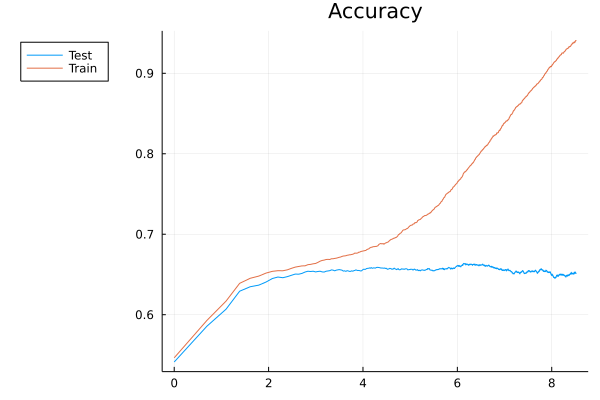

In [40]:
save_resultTest = save_resultTest ./ 10;
save_resultTrain = save_resultTrain ./ 10;

plot(log.(1:epochs), save_resultTest,label="Test")
plot!(log.(1:epochs), save_resultTrain,label = "Train", title = "Accuracy", legend = :outertopleft)

In [42]:
# change the output from probability into  0 or 1

simplified_x_train_result = []
for i  = 1:size(x_train,2)
    if model(x_train[:,i])[1]>0.5
        push!(simplified_x_train_result, 0)
    else
        push!(simplified_x_train_result, 1)
    end
end
simplified_y_train = []
for i  = 1:size(x_train,2)
    if y_train[:,i][1] == true
        push!(simplified_y_train, 0)
    else
        push!(simplified_y_train, 1)
    end
end

# ConfusionMatrix for the training data
print("ConfusionMatrix for the training data\n")
ConfusionMatrix()(simplified_x_train_result, simplified_y_train )

ConfusionMatrix for the training data


┌ Warning: The classes are un-ordered,
│ using: negative='0' and positive='1'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\xkzmx\.julia\packages\MLJBase\pCiRR\src\measures\confusion_matrix.jl:112


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │      0      │      1      │
├─────────────┼─────────────┼─────────────┤
│      0      │     650     │     27      │
├─────────────┼─────────────┼─────────────┤
│      1      │     39      │     672     │
└─────────────┴─────────────┴─────────────┘


In [44]:
# change the output from probability into  0 or 1

simplified_x_test_result = []
for i  = 1:size(x_test,2) 
    if model(x_test[:,i])[1]>0.5
        push!(simplified_x_test_result, 0)
    else
        push!(simplified_x_test_result, 1)
    end
end
simplified_y_test = []
for i  = 1:size(x_test,2) 
    if y_test[:,i][1] == true
        push!(simplified_y_test, 0)
    else
        push!(simplified_y_test, 1)
    end
end

# ConfusionMatrix for the test data
print("ConfusionMatrix for the test data\n")
ConfusionMatrix()(simplified_x_test_result, simplified_y_test)

ConfusionMatrix for the test data


┌ Warning: The classes are un-ordered,
│ using: negative='0' and positive='1'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\xkzmx\.julia\packages\MLJBase\pCiRR\src\measures\confusion_matrix.jl:112


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │      0      │      1      │
├─────────────┼─────────────┼─────────────┤
│      0      │     198     │     112     │
├─────────────┼─────────────┼─────────────┤
│      1      │     103     │     183     │
└─────────────┴─────────────┴─────────────┘
